In [44]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, MaxPooling2D, Flatten, Dense, Dropout

In [45]:
train_set = h5py.File('datasets/train_happy.h5', "r")
X_train = np.array(train_set["train_set_x"][:]) / 255
y_train = np.array(train_set["train_set_y"][:]).reshape(-1, 1)

In [46]:
test_set = h5py.File('datasets/test_happy.h5', "r")
X_test = np.array(test_set["test_set_x"][:]) / 255
y_test = np.array(test_set["test_set_y"][:]).reshape(-1, 1)

In [47]:
classes = np.array(test_set["list_classes"][:])

In [48]:
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [49]:
print("Number of training examples =", X_train.shape[0])
print("Number of test examples =", X_test.shape[0])
print("X_train shape:", X_train.shape)
print("Y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", y_test.shape)

Number of training examples = 600
Number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


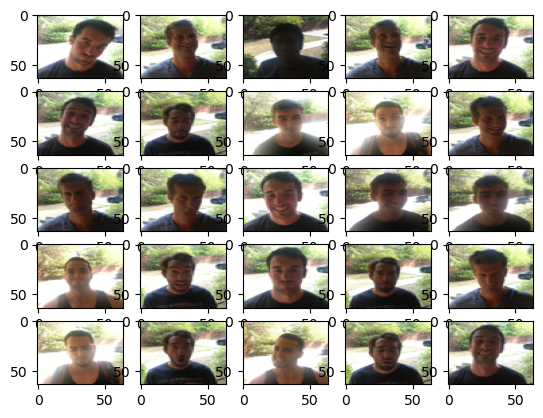

In [50]:
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(X_train[k], aspect='auto')
        k += 1

plt.show()

In [51]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(7, 7), padding='same', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(filters=64, kernel_size=(5, 5), padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'), 
    Dense(1, activation='sigmoid')
    ])

In [52]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 12s 265ms/step - loss: 1.1176 - accuracy: 0.6783
Epoch 2/10
38/38 [==============================] - 10s 272ms/step - loss: 0.4345 - accuracy: 0.7700
Epoch 3/10
38/38 [==============================] - 10s 253ms/step - loss: 0.3394 - accuracy: 0.8400
Epoch 4/10
38/38 [==============================] - 10s 252ms/step - loss: 0.2951 - accuracy: 0.8533
Epoch 5/10
38/38 [==============================] - 10s 253ms/step - loss: 0.2884 - accuracy: 0.8917
Epoch 6/10
38/38 [==============================] - 10s 261ms/step - loss: 0.2406 - accuracy: 0.8983
Epoch 7/10
38/38 [==============================] - 10s 253ms/step - loss: 0.2056 - accuracy: 0.9033
Epoch 8/10
38/38 [==============================] - 10s 256ms/step - loss: 0.2053 - accuracy: 0.8950
Epoch 9/10
38/38 [==============================] - 10s 255ms/step - loss: 0.1857 - accuracy: 0.9117
Epoch 10/10
38/38 [==============================] - 10s 256ms/step - loss: 0.1478 - accura

In [54]:
metrics = pd.DataFrame(model.history.history)

In [55]:
metrics.head()

,loss,accuracy
0,1.117609,0.678333
1,0.434467,0.770000
2,0.339400,0.840000
3,0.295058,0.853333
4,0.288434,0.891667


<AxesSubplot:>

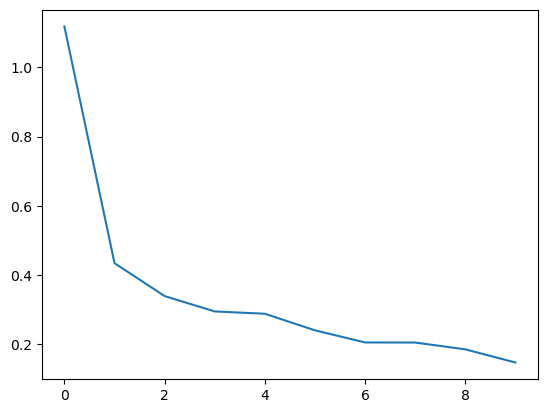

In [56]:
metrics['loss'].plot()

<AxesSubplot:>

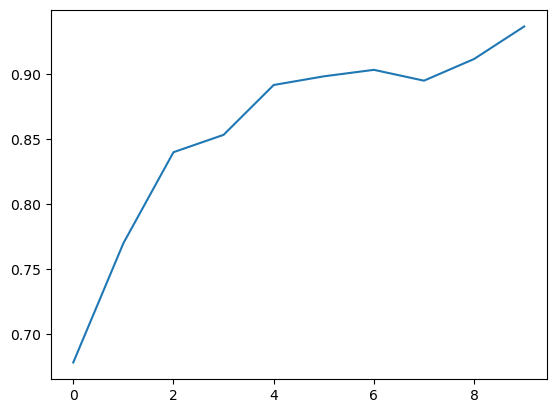

In [57]:
metrics['accuracy'].plot()

In [58]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

5/5 [==============================] - 1s 128ms/step - loss: 0.2030 - accuracy: 0.9200
Test Loss: 0.20302248001098633
Test Accuracy: 0.9200000166893005
